<a href="https://colab.research.google.com/github/Python-Charmer/Final-Project-Team-Python-Charmer/blob/master/FinalProject_Mallik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Final Project - Team Python Charmers


In [0]:
import pandas as pd
import numpy as np

In [0]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(url, header  = None , na_values='?')

In [31]:
names = ['Scn','A2','A3','A4','A5','A6','A7', 'A8','A9','A10','Class']
df.columns = names
df.head()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [33]:
# Finding the information about columns and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Scn      699 non-null int64
A2       699 non-null int64
A3       699 non-null int64
A4       699 non-null int64
A5       699 non-null int64
A6       699 non-null int64
A7       683 non-null float64
A8       699 non-null int64
A9       699 non-null int64
A10      699 non-null int64
Class    699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


In [34]:
# Displaying statistics for all columns in the dataframe
df.describe()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [32]:
# Finding null values in the dataframe
pd.isnull(df).any()

Scn      False
A2       False
A3       False
A4       False
A5       False
A6       False
A7        True
A8       False
A9       False
A10      False
Class    False
dtype: bool

In [43]:
pd.isnull(df).sum()

Scn       0
A2        0
A3        0
A4        0
A5        0
A6        0
A7       16
A8        0
A9        0
A10       0
Class     0
dtype: int64

In [36]:
df['A7'].value_counts()

1.0     402
10.0    132
5.0      30
2.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: A7, dtype: int64

In [37]:
df['A7'].isnull().sum()

16

In [38]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
missing_values_table(df)

Your selected dataframe has 11 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
A7,16,2.3


In [35]:
df.A7.describe()

count    683.000000
mean       3.544656
std        3.643857
min        1.000000
25%        1.000000
50%        1.000000
75%        6.000000
max       10.000000
Name: A7, dtype: float64

In [39]:
df.loc[df["A7"]>2].sum()

Scn      250670140.0
A2            1656.0
A3            1481.0
A4            1489.0
A5            1289.0
A6            1228.0
A7            1959.0
A8            1378.0
A9            1319.0
A10            589.0
Class          932.0
dtype: float64

In [52]:
# Finding duplicate rows in the dataframe
df.duplicated().value_counts()

False    691
True       8
dtype: int64

In [41]:
# Printing the rows which are duplciate in the dataframe
df.loc[df.duplicated(), :]

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,Class
208,1218860,1,1,1,1,1,1.0,3,1,1,2
253,1100524,6,10,10,2,8,10.0,7,3,3,4
254,1116116,9,10,10,1,10,8.0,3,3,1,4
258,1198641,3,1,1,1,2,1.0,3,1,1,2
272,320675,3,3,5,2,3,10.0,7,1,1,4
338,704097,1,1,1,1,1,1.0,2,1,1,2
561,1321942,5,1,1,1,2,1.0,3,1,1,2
684,466906,1,1,1,1,2,1.0,1,1,1,2


In [42]:
df.Scn.duplicated().value_counts()

False    645
True      54
Name: Scn, dtype: int64

In [44]:
print(df.describe())

                Scn          A2          A3          A4          A5  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

               A6          A7          A8          A9         A10       Class  
count  699.000000  683.000000  699.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.544656    3.437768    2.866953    1.589413    2.689557  
std      2.214300    3.643857    2.438364    3.053634    1.715078    0.951273  
min      1.000000    1.000000    1.00000

In [45]:
# Printing the rows which contain NaN in Columns 'A7'
null_columns=df.columns[df.isnull().any()]
df[df['A7'].isnull()][null_columns]

,A7
23,NaN
40,NaN
139,NaN
145,NaN
158,NaN
164,NaN
235,NaN
249,NaN
275,NaN
292,NaN


In [0]:
# Replace missing values in column 'A7' with Nan
df['A7'] = df['A7'].replace('?',np.NaN)

In [0]:
# Convert missing values to numeric
df['A7'] = df['A7'].apply(pd.to_numeric)

In [0]:
# Replace the missing values of column 'A7' with its mean
df = df.fillna(df.mean(skipna = True))

In [49]:
# Inspecting the dataframe after replacing the missing values
df['A7'].isnull().sum()

0

In [0]:
import matplotlib.pyplot as plt

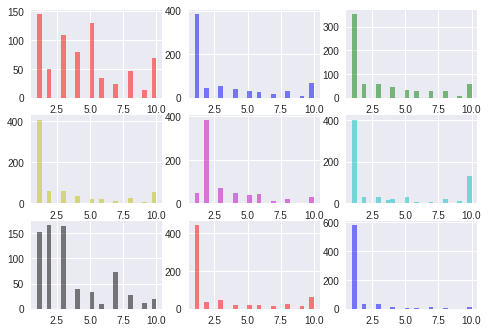

In [51]:
# Plotting histograms for columns A2 thru A9
fig = plt.figure()
colors = 'wrbgymckrbg'
for i in range(1, 10):
  ax = fig.add_subplot(3, 3, i)
  ax.hist(df.iloc[:, i], bins=25, alpha=0.5, color=colors[i])